<a href="https://colab.research.google.com/github/smandalsid/Tensorflow/blob/main/Sec3_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-08-13 18:14:55--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-08-13 18:14:56 (37.7 MB/s) - ‘moore.csv’ saved [2302/2302]



In [4]:
# load data
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [5]:
data=pd.read_csv("moore.csv", header=None).to_numpy()

In [6]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [7]:
X=data[:, 0].reshape(-1, 1) # making a N X D matrix

In [8]:
y=data[:, 1]

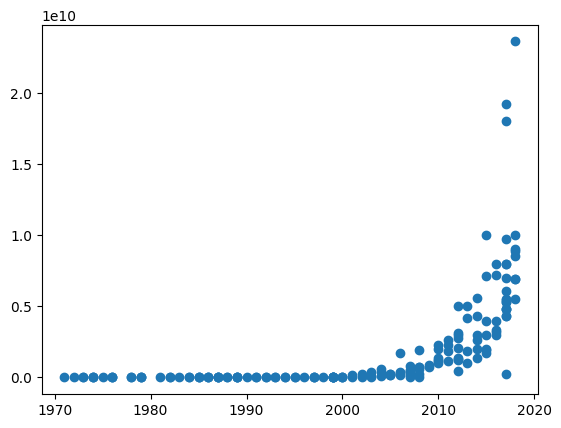

In [9]:
plt.scatter(X, y)

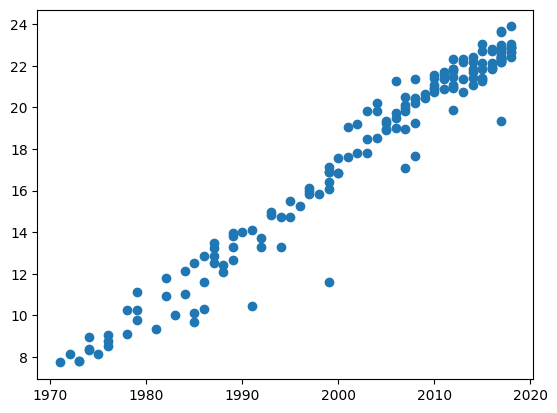

In [10]:
Y=np.log(y)
plt.scatter(X, Y)

In [11]:
X=X-X.mean()

In [12]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1, )),
    tf.keras.layers.Dense(1),
])

In [13]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9),
    loss='mse',
)

In [14]:
def schedule(epoch, lr):
  if epoch>=50:
    return 0.0001
  return 0.001

scheduler=tf.keras.callbacks.LearningRateScheduler(schedule)

In [15]:
r=model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 4ms/step - loss: 378.8116 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 312.9101 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 241.7789 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 190.7292 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 150.7840 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 117.3621 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 111.0340 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 77.3340 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 51.0685 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 40.0444 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 3ms/step - loss: 

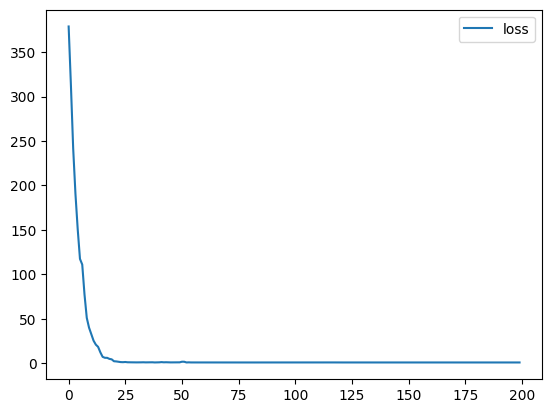

In [16]:
plt.plot(r.history['loss'], label='loss')
plt.legend();

In [17]:
model.layers

In [18]:
model.layers[0].get_weights()

[array([[0.3430375]], dtype=float32), array([17.760288], dtype=float32)]

In [19]:
a=model.layers[0].get_weights()[0][0][0]

In [20]:
a

0.3430375

In [21]:
print(f'Tume to double: {np.log(2)/a}')

Tume to double: 2.020616430257016


In [22]:
X=X.flatten()
X

array([-31.19753086, -30.19753086, -29.19753086, -29.19753086,
       -28.19753086, -28.19753086, -28.19753086, -27.19753086,
       -26.19753086, -26.19753086, -26.19753086, -24.19753086,
       -24.19753086, -23.19753086, -23.19753086, -23.19753086,
       -21.19753086, -20.19753086, -20.19753086, -19.19753086,
       -18.19753086, -18.19753086, -17.19753086, -17.19753086,
       -17.19753086, -16.19753086, -16.19753086, -16.19753086,
       -15.19753086, -15.19753086, -15.19753086, -15.19753086,
       -14.19753086, -14.19753086, -13.19753086, -13.19753086,
       -13.19753086, -13.19753086, -12.19753086, -11.19753086,
       -11.19753086, -10.19753086, -10.19753086,  -9.19753086,
        -9.19753086,  -8.19753086,  -8.19753086,  -7.19753086,
        -3.19753086,  -7.19753086,  -6.19753086,  -5.19753086,
        -5.19753086,  -5.19753086,  -4.19753086,  -3.19753086,
        -3.19753086,  -2.19753086,  -2.19753086,  -3.19753086,
        -3.19753086,  -3.19753086,  -2.19753086,  -1.19

In [23]:
denominator=X.dot(X)-X.mean()*X.sum()
a=(X.dot(Y)-Y.mean()*X.sum())/denominator
b=(Y.mean()*X.dot(X)-X.mean()*X.dot(Y))/denominator
print(a, b)

0.341682487387313 17.764939393631764


In [24]:
print(f'Time to double: {np.log(2)/a}')

Time to double: 2.0286295205239204


# **Making prediction**

In [26]:
yhat=model.predict(X).flatten()
yhat

6/6 [==============================] - 0s 2ms/step


array([ 7.058366 ,  7.4014034,  7.744441 ,  7.744441 ,  8.087479 ,
        8.087479 ,  8.087479 ,  8.430515 ,  8.773553 ,  8.773553 ,
        8.773553 ,  9.459628 ,  9.459628 ,  9.802666 ,  9.802666 ,
        9.802666 , 10.488741 , 10.831778 , 10.831778 , 11.174816 ,
       11.517853 , 11.517853 , 11.86089  , 11.86089  , 11.86089  ,
       12.203928 , 12.203928 , 12.203928 , 12.546966 , 12.546966 ,
       12.546966 , 12.546966 , 12.890003 , 12.890003 , 13.23304  ,
       13.23304  , 13.23304  , 13.23304  , 13.576078 , 13.919115 ,
       13.919115 , 14.262153 , 14.262153 , 14.60519  , 14.60519  ,
       14.948228 , 14.948228 , 15.2912655, 16.663416 , 15.2912655,
       15.634303 , 15.977341 , 15.977341 , 15.977341 , 16.320377 ,
       16.663416 , 16.663416 , 17.006453 , 17.006453 , 16.663416 ,
       16.663416 , 16.663416 , 17.006453 , 17.349491 , 17.349491 ,
       17.692528 , 18.378603 , 18.378603 , 18.72164  , 19.064678 ,
       18.72164  , 19.064678 , 19.407715 , 19.750753 , 18.0355

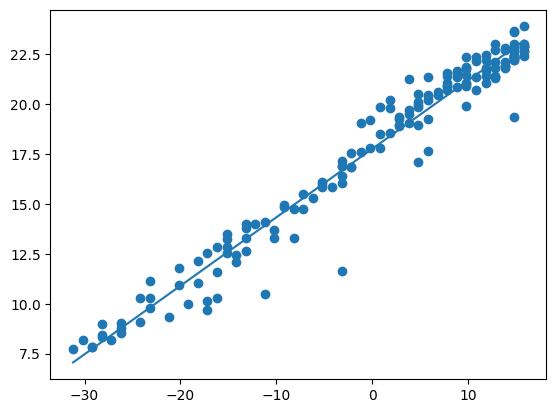

In [28]:
plt.scatter(X, Y)
plt.plot(X, yhat)

manual

In [29]:
w, b=model.layers[0].get_weights()
X=X.reshape(-1, 1)
yhat2=(X.dot(w)+b).flatten()
# similar to == but for float values
np.allclose(yhat, yhat2)

True

In [35]:
model.layers[0].get_weights()

[array([[0.3430375]], dtype=float32), array([17.760288], dtype=float32)]